In [2]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3]:
dataset_path = "data/samsung/005930.KS.csv"

In [4]:
df_base = pd.read_csv(dataset_path)
df_base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554


In [5]:
df_base.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
type(df_base.Date[0])

str

In [7]:
df_sec = pd.read_csv(dataset_path, parse_dates=['Date'])
df_sec.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554


In [8]:
type(df_sec.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

### Date Time Indexing

In [9]:
df = pd.read_csv(dataset_path, parse_dates=['Date'], index_col = 'Date')

In [10]:
df.columns = df.columns.str.replace(' ','_')
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554


In [11]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

In [12]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-26',
               '2023-12-27', '2023-12-28', '2024-01-02', '2024-01-03',
               '2024-01-04', '2024-01-05'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)

In [13]:
df["2019-01"]

KeyError: '2019-01'

In [14]:
df.loc["2019-01"]

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554
2019-01-09,38650.0,39600.0,38300.0,39600.0,34861.835938,17452708
2019-01-10,40000.0,40150.0,39600.0,39800.0,35037.906250,14731699
2019-01-11,40350.0,40550.0,39950.0,40500.0,35654.152344,11661063
2019-01-14,40450.0,40700.0,39850.0,40050.0,35257.988281,11984996


In [15]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554


In [16]:
df.Close.mean()

62905.02024291498

In [17]:
df.loc['2023'].Close

Date
2023-01-02    55500.0
2023-01-03    55400.0
2023-01-04    57800.0
2023-01-05    58200.0
2023-01-06    59000.0
               ...   
2023-12-21    75000.0
2023-12-22    75900.0
2023-12-26    76600.0
2023-12-27    78000.0
2023-12-28    78500.0
Name: Close, Length: 245, dtype: float64

In [18]:
df.loc['2023'].Close.mean()

67455.51020408163

In [19]:
df.loc['2022-06':'2023-12']

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2022-06-02,66600.0,67000.0,66400.0,66700.0,64733.335938,14959443
2022-06-03,67200.0,67300.0,66800.0,66800.0,64830.390625,8222883
2022-06-07,66200.0,66400.0,65400.0,65500.0,63568.722656,19355755
2022-06-08,65400.0,65700.0,65300.0,65300.0,63374.617188,12483180
2022-06-09,65100.0,65200.0,64500.0,65200.0,63277.570312,25790725
...,...,...,...,...,...,...
2023-12-21,74600.0,75000.0,74300.0,75000.0,75000.000000,13478766
2023-12-22,75800.0,76300.0,75400.0,75900.0,75900.000000,14515608
2023-12-26,76100.0,76700.0,75700.0,76600.0,76600.000000,13164909


### Resampling

<Axes: xlabel='Date'>

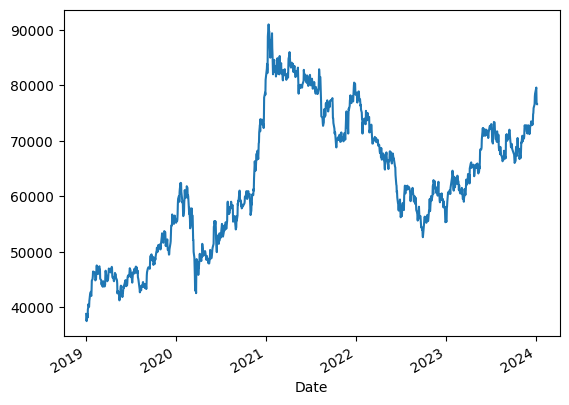

In [20]:
df.Close.plot()

In [21]:
monthly_avg = df.Close.resample('M').mean()
monthly_avg

Date
2019-01-31    41600.000000
2019-02-28    46308.823529
2019-03-31    44560.000000
2019-04-30    46061.363636
2019-05-31    43023.809524
                  ...     
2023-09-30    70168.421053
2023-10-31    67910.526316
2023-11-30    71409.090909
2023-12-31    73810.526316
2024-01-31    77450.000000
Freq: M, Name: Close, Length: 61, dtype: float64

<Axes: xlabel='Date'>

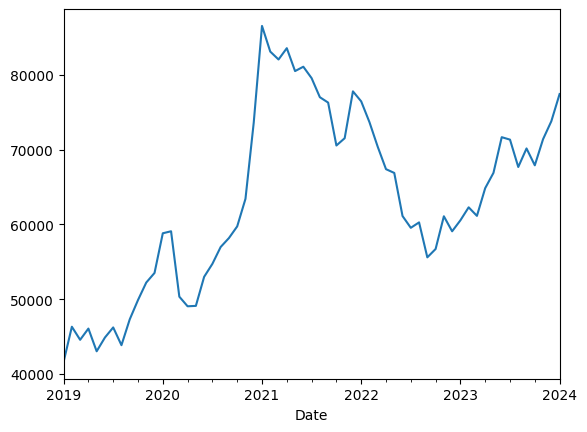

In [22]:
monthly_avg.plot()

In [23]:
q = df.Close.resample('Q').mean()
q

Date
2019-03-31    43960.169492
2019-06-30    44666.129032
2019-09-30    45749.206349
2019-12-31    51844.354839
2020-03-31    55891.935484
2020-06-30    50483.606557
2020-09-30    56562.500000
2020-12-31    65783.606557
2021-03-31    83886.666667
2021-06-30    81795.238095
2021-09-30    77709.677419
2021-12-31    73433.333333
2022-03-31    73403.448276
2022-06-30    65173.770492
2022-09-30    58546.031746
2022-12-31    59067.741935
2023-03-31    61322.580645
2023-06-30    67873.770492
2023-09-30    69687.096774
2023-12-31    71061.666667
2024-03-31    77450.000000
Freq: Q-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

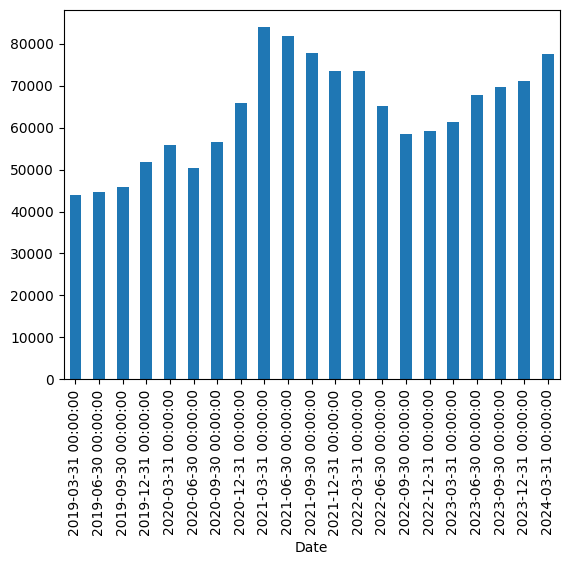

In [24]:
q.plot(kind='bar')

## Create Feature Function

In [25]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554


In [26]:
def create_feature(df):

    """
        Create time series features
    """
    df_feature = df.copy()
    df_feature["day_of_week"] = df.index.day_of_week
    df_feature['quarter'] = df.index.quarter
    df_feature['month'] = df.index.month
    df_feature['year'] = df.index.year
    return df_feature

In [27]:
df_feature = create_feature(df)
df_feature

,Open,High,Low,Close,Adj_Close,Volume,day_of_week,quarter,month,year
Date,,,,,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664,2,1,1,2019
2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493,3,1,1,2019
2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958,4,1,1,2019
2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997,0,1,1,2019
2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...
2023-12-28,77700.0,78500.0,77500.0,78500.0,78500.000000,17797536,3,4,12,2023
2024-01-02,78200.0,79800.0,78200.0,79600.0,79600.000000,17142847,1,1,1,2024
2024-01-03,78500.0,78800.0,77000.0,77000.0,77000.000000,21753644,2,1,1,2024


## Visualize Feature / Target Relationship

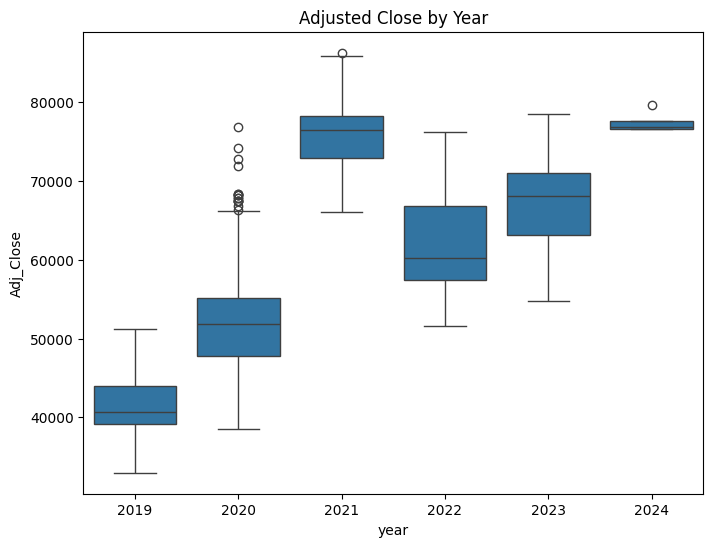

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_feature, x='year', y='Adj_Close')
ax.set_title('Adjusted Close by Year')
plt.show()

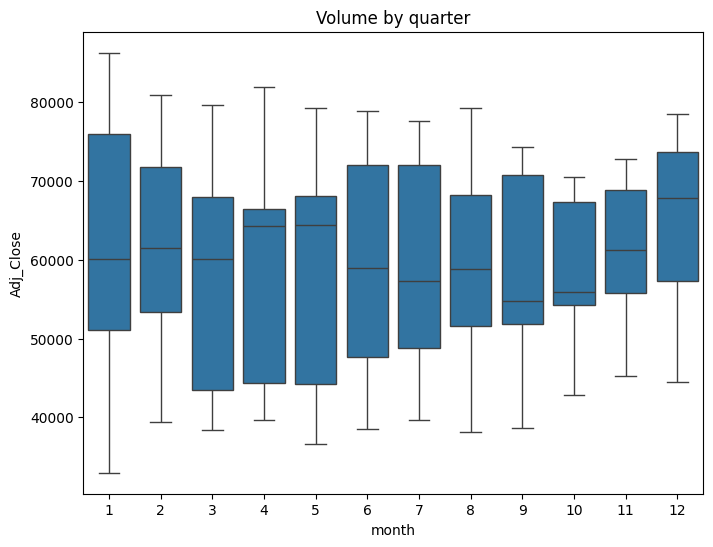

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_feature, x='month', y='Adj_Close')
ax.set_title('Volume by quarter')
plt.show()

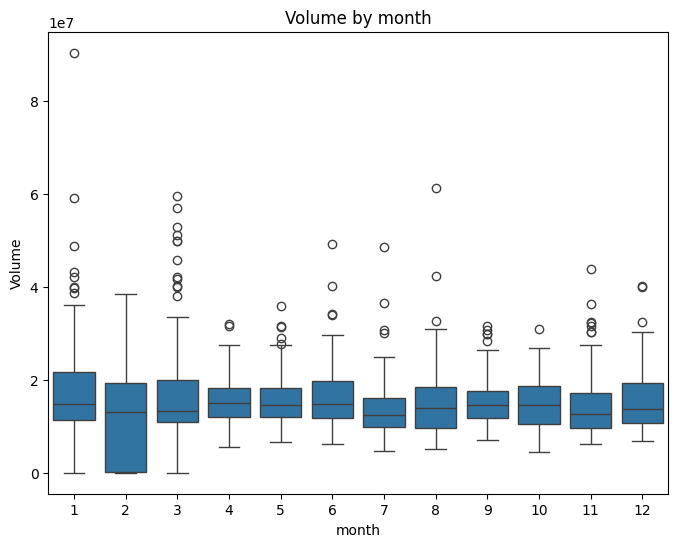

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_feature, x='month', y='Volume')
ax.set_title('Volume by month')
plt.show()

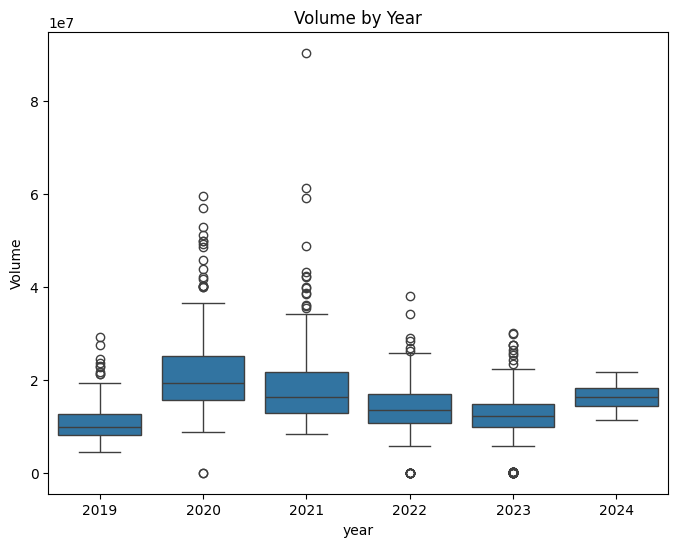

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_feature, x='year', y='Volume')
ax.set_title('Volume by Year')
plt.show()

In [31]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-26',
               '2023-12-27', '2023-12-28', '2024-01-02', '2024-01-03',
               '2024-01-04', '2024-01-05'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)

## Train and Test split

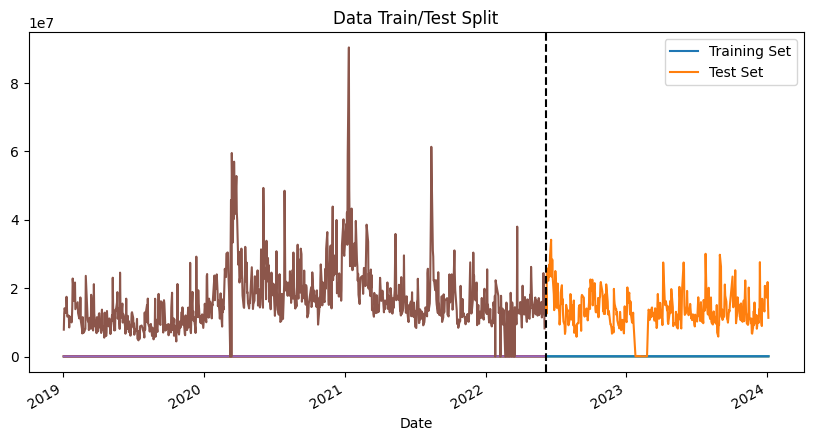

In [32]:
train = df.loc[df.index < '2022-06-06']
test = df.loc[df.index >= '2022-06-06']

fig, ax = plt.subplots(figsize=(10, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2022-06-06', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Create our Model

In [33]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [34]:
train = create_feature(train)
test = create_feature(test)

FEATURES = ['day_of_week', 'quarter', 'month', 'year']
TARGET = 'Adj_Close'

In [35]:
X_train = train[FEATURES]
y_train = train[TARGET]

In [36]:
X_test = test[FEATURES]
y_test = test[TARGET]

In [37]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

# reg = xgb.XGBRegressor(n_estimators=100, early_stopping_rounds=50, learnig_rate=0.01)

In [38]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:59210.96533	validation_1-rmse:63443.17878


/home/samin/anaconda3/envs/py11/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:06:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:22052.19025	validation_1-rmse:21337.86258
[200]	validation_0-rmse:8513.13271	validation_1-rmse:8649.08162
[300]	validation_0-rmse:3812.73290	validation_1-rmse:6612.72902
[348]	validation_0-rmse:2893.54011	validation_1-rmse:6731.08704


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

## Feature Importance

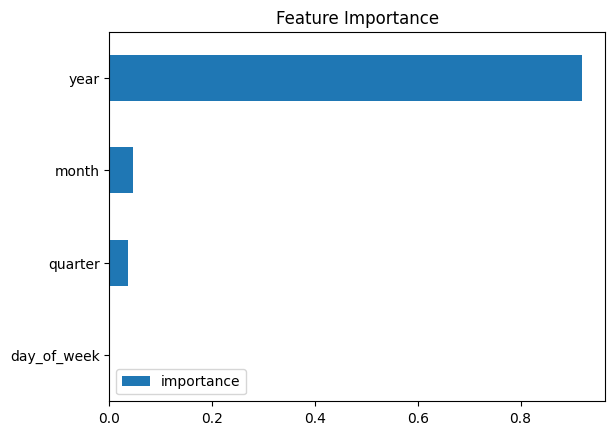

In [39]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### Creating model without the create_feature() function.

In [40]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554


In [43]:
df_n = df.copy()

In [42]:
df_n = df_n.drop(['day_of_week', 'quarter','month', 'year'], axis=1)
df_n.head()

KeyError: "['day_of_week', 'quarter', 'month', 'year'] not found in axis"

In [47]:
df_n.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34113.542969,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33101.140625,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,32969.082031,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34113.542969,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,33541.312500,12756554


In [48]:
FEATURES = ['Open', 'High', 'Low', 'Close', 'Volume']
TARGET = 'Adj_Close'

In [49]:
X_train = train[FEATURES]
y_train = train[TARGET]

In [50]:
X_test = test[FEATURES]
y_test = test[TARGET]

In [51]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

In [52]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:59209.06663	validation_1-rmse:63581.13914


/home/samin/anaconda3/envs/py11/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:08:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:21866.33614	validation_1-rmse:25777.23947
[200]	validation_0-rmse:8108.70686	validation_1-rmse:11703.80250
[300]	validation_0-rmse:3044.04622	validation_1-rmse:6603.56426
[400]	validation_0-rmse:1210.81782	validation_1-rmse:4734.63652
[500]	validation_0-rmse:606.67419	validation_1-rmse:4042.82603
[600]	validation_0-rmse:448.84201	validation_1-rmse:3794.18405
[700]	validation_0-rmse:415.56175	validation_1-rmse:3702.97528
[800]	validation_0-rmse:404.50915	validation_1-rmse:3670.60720
[900]	validation_0-rmse:395.38862	validation_1-rmse:3665.00251
[999]	validation_0-rmse:390.14759	validation_1-rmse:3661.97280


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

## Prediction

In [53]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

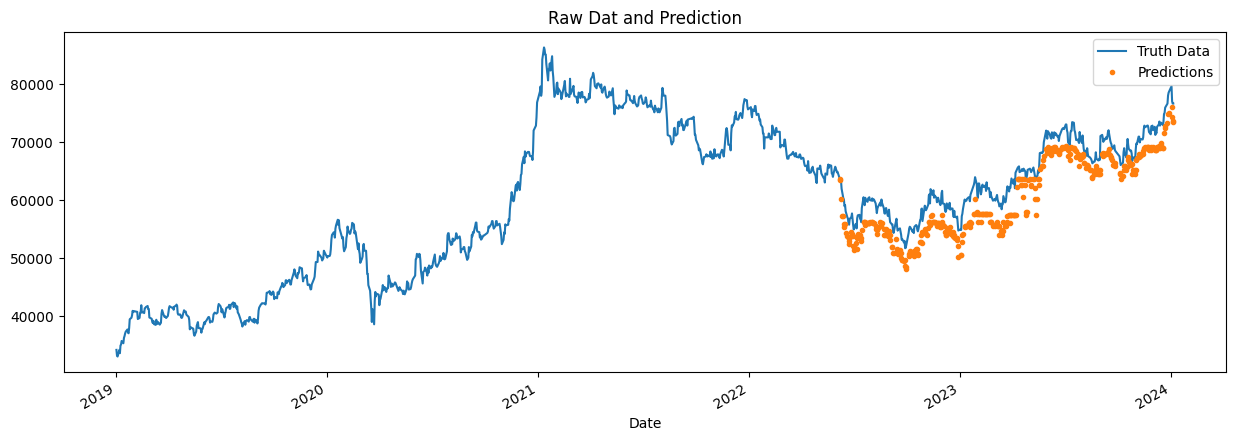

In [54]:
ax = df[['Adj_Close']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [55]:
df.tail(20)

,Open,High,Low,Close,Adj_Close,Volume,prediction
Date,,,,,,,
2023-12-06,71800.0,72100.0,71600.0,71700.0,71700.0,8123087,68602.929688
2023-12-07,71800.0,71900.0,71100.0,71500.0,71500.0,8862017,68604.648438
2023-12-08,72100.0,72800.0,71900.0,72600.0,72600.0,10859463,69055.734375
2023-12-11,72800.0,73000.0,72200.0,73000.0,73000.0,9861960,69014.984375
2023-12-12,73300.0,73500.0,73100.0,73500.0,73500.0,13758646,69236.429688
2023-12-13,73300.0,73500.0,72800.0,72800.0,72800.0,13116766,68999.203125
2023-12-14,74100.0,74300.0,72500.0,73100.0,73100.0,27567593,69754.312500
2023-12-15,73800.0,74000.0,73200.0,73300.0,73300.0,15419815,69531.320312
2023-12-18,73300.0,73400.0,72800.0,72900.0,72900.0,9690551,69007.429688


## Score RSME

In [56]:
score = np.sqrt(mean_squared_error(test['Adj_Close'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3661.89


## Calculate Error

In [57]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2023-04-07    7316.515625
2023-04-27    6352.226562
2023-05-12    6349.238281
2023-04-26    6324.460938
2023-03-31    6230.304688
2023-04-05    6150.234375
2023-03-29    5970.843750
2023-04-04    5858.222656
2023-09-01    5839.992188
2023-01-26    5623.820312
Name: error, dtype: float64